<a href="https://colab.research.google.com/github/adinwp/supreme-winner/blob/master/W6W7W8_Adin_Pratama_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA CLEANING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#READ THE DATASET

In [3]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1DzrRKhZzmemhGnw27zOlU4o79ypP3V9ENvsMcil3_CI/edit#gid=141837072'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=xlsx&gid=')
df_order = pd.read_excel(sheet_url_trf)
df_order.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [4]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1lQh5i1paTtMKquuT00iFYwP1TK0jATZ9dezIY05cU-8/edit#gid=759034516'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=xlsx&gid=')
df_payment = pd.read_excel(sheet_url_trf)
df_payment.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1.000,credit_card,8.000,99.330
1,a9810da82917af2d9aefd1278f1dcfa0,1.000,credit_card,1.000,24.390
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.000,credit_card,1.000,65.710
3,ba78997921bbcdc1373bb41e913ab953,1.000,credit_card,8.000,107.780
4,42fdf880ba16b47b59251dd489d4441a,1.000,credit_card,2.000,128.450


In [5]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1yYu2_WVJ5L7A0ZxCvaXkqkplMml9c5WGKPidWrtEiXg/edit#gid=1668504735'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=xlsx&gid=')
df_customer = pd.read_excel(sheet_url_trf)
df_customer.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409.000,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790.000,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151.000,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775.000,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056.000,campinas,SP


#CLEANING DATASET

In [6]:
dfc_order=df_order.copy()

In [7]:
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [8]:
dfc_order.drop(columns=['order_delivered_carrier_date','order_delivered_customer_date'],inplace=True)

In [9]:
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [10]:
dfc_payment=df_payment.copy()

In [11]:
dfc_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  float64
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  float64
 4   payment_value         103886 non-null  float64
dtypes: float64(3), object(2)
memory usage: 4.0+ MB


In [12]:
dfc_payment.drop(columns=['payment_sequential'],inplace=True)

In [13]:
dfc_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_type          103886 non-null  object 
 2   payment_installments  103886 non-null  float64
 3   payment_value         103886 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.2+ MB


In [14]:
dfc_customer=df_customer.copy()

In [15]:
dfc_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  float64
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


#Missing Values

In [16]:
dfc_order.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                160
order_estimated_delivery_date      0
dtype: int64

In [17]:
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


In [18]:
dfc_order.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-23


In [19]:
dfc_order.dropna(subset=['order_approved_at'],inplace=True)

In [20]:
dfc_order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_estimated_delivery_date    0
dtype: int64

In [21]:
dfc_payment.isna().sum()

order_id                0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
dfc_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#REMOVING DUPLICATE VALUE

In [23]:
dfc_order.duplicated().sum()

0

In [24]:
dfc_payment.duplicated().sum()

614

In [25]:
dfc_payment.drop_duplicates(inplace=True)

In [26]:
dfc_payment.duplicated().sum()

0

In [27]:
dfc_customer.duplicated().sum()

0

#HANDLING OUTLIERS

In [28]:
dfc_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103272 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103272 non-null  object 
 1   payment_type          103272 non-null  object 
 2   payment_installments  103272 non-null  float64
 3   payment_value         103272 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.9+ MB


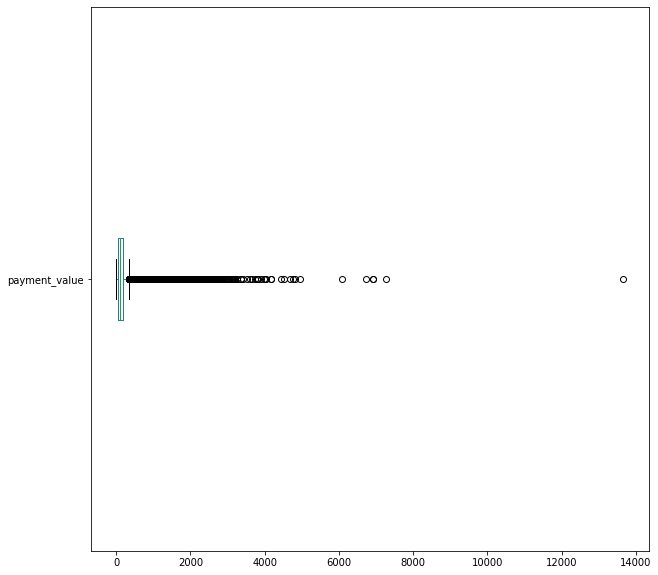

In [83]:
dfc_payment.boxplot(column=['payment_value'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

In [86]:
q1 = dfc_payment['payment_value'].quantile(.25)
q3 = dfc_payment['payment_value'].quantile(.75)
IQR = q3-q1
UIF = q3+(1.5*IQR)
LIF = q1-(1.5*IQR)

print('IQR',IQR)
print('UIF',UIF)
print('LIF',LIF)

IQR 114.975
UIF 344.9275
LIF -114.97249999999997


In [87]:
df_clean_payment = dfc_payment[(dfc_payment['payment_value']<=UIF)&(dfc_payment['payment_value']>=LIF)]
df_clean_payment

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8.0,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1.0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1.0,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8.0,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2.0,128.45
...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,credit_card,2.0,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,credit_card,4.0,280.65
103882,7b905861d7c825891d6347454ea7863f,credit_card,2.0,96.8
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1.0,47.77


In [89]:
dfc_payment = dfc_payment[(dfc_payment['payment_value'] < UIF) &(dfc_payment['payment_value'] > LIF) ]
dfc_payment

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8.0,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1.0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1.0,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8.0,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2.0,128.45
...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,credit_card,2.0,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,credit_card,4.0,280.65
103882,7b905861d7c825891d6347454ea7863f,credit_card,2.0,96.8
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1.0,47.77


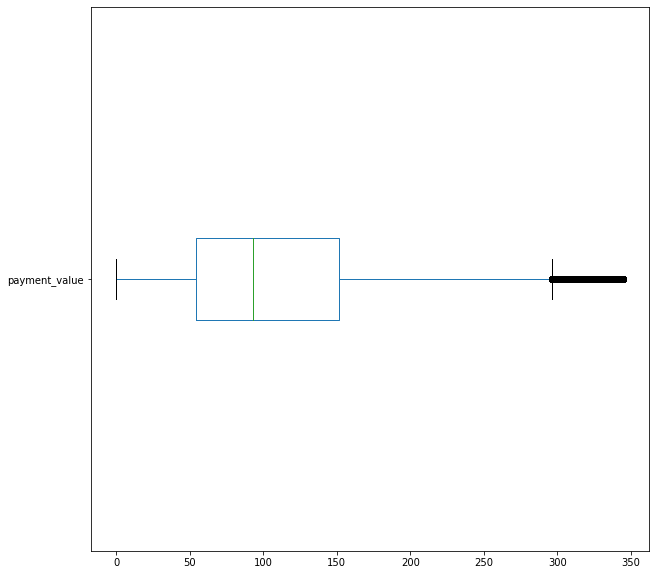

In [90]:
dfc_payment.boxplot(column=['payment_value'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

#CONVERT DATA TYPE

In [31]:
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99281 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 5.3+ MB


In [32]:
dfc_order.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26


In [33]:
dfc_order['order_estimated_delivery_date'] = pd.to_datetime(dfc_order['order_estimated_delivery_date'],format='%Y-%m-%d',errors='coerce')

In [34]:
dfc_order['order_approved_at'] = pd.to_datetime(dfc_order['order_approved_at'],format='%Y-%m-%d',errors='coerce')

##I'm trying to remove timestamp from order_approved_at data

In [35]:
dfc_order['order_approved_at'] = pd.to_datetime(dfc_order['order_approved_at'])

In [36]:
dfc_order['order_approve_date'] = dfc_order['order_approved_at'].dt.date

In [37]:
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99281 non-null  datetime64[ns]
 6   order_approve_date             99281 non-null  object        
dtypes: datetime64[ns](3), object(4)
memory usage: 6.1+ MB


In [38]:
dfc_order.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,2018-07-26
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26,2018-02-13


In [39]:
df_clean_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95313 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              95313 non-null  object 
 1   payment_type          95313 non-null  object 
 2   payment_installments  95313 non-null  float64
 3   payment_value         95313 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.6+ MB


In [40]:
df_clean_payment.head(5)

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8.000,99.330
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1.000,24.390
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1.000,65.710
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8.000,107.780
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2.000,128.450


In [41]:
df_clean_payment['payment_value'] = df_clean_payment['payment_value'].astype(int)
df_clean_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95313 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              95313 non-null  object 
 1   payment_type          95313 non-null  object 
 2   payment_installments  95313 non-null  float64
 3   payment_value         95313 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_clean_payment['payment_installments'] = df_clean_payment['payment_installments'].astype(int)
df_clean_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95313 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              95313 non-null  object
 1   payment_type          95313 non-null  object
 2   payment_installments  95313 non-null  int64 
 3   payment_value         95313 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.6+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_clean_payment.head(5)

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128


#MERGE DATASET

In [44]:
dfc_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99281 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99281 non-null  object        
 1   customer_id                    99281 non-null  object        
 2   order_status                   99281 non-null  object        
 3   order_purchase_timestamp       99281 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99281 non-null  datetime64[ns]
 6   order_approve_date             99281 non-null  object        
dtypes: datetime64[ns](3), object(4)
memory usage: 6.1+ MB


In [45]:
df_clean_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95313 entries, 0 to 103885
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              95313 non-null  object
 1   payment_type          95313 non-null  object
 2   payment_installments  95313 non-null  int64 
 3   payment_value         95313 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.6+ MB


In [46]:
dfc_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  float64
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


In [47]:
dfmerge_1 = pd.merge(dfc_order,df_clean_payment,left_on='order_id',right_on='order_id',how='left')
dfmerge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102967 entries, 0 to 102966
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102967 non-null  object        
 1   customer_id                    102967 non-null  object        
 2   order_status                   102967 non-null  object        
 3   order_purchase_timestamp       102967 non-null  datetime64[ns]
 4   order_approved_at              102967 non-null  datetime64[ns]
 5   order_estimated_delivery_date  102967 non-null  datetime64[ns]
 6   order_approve_date             102967 non-null  object        
 7   payment_type                   95169 non-null   object        
 8   payment_installments           95169 non-null   float64       
 9   payment_value                  95169 non-null   float64       
dtypes: datetime64[ns](3), float64(2), object(5)
memory usage: 8.6+ MB


In [48]:
dfmerge = pd.merge(dfmerge_1,dfc_customer,left_on='customer_id',right_on='customer_id',how='left')
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102967 entries, 0 to 102966
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102967 non-null  object        
 1   customer_id                    102967 non-null  object        
 2   order_status                   102967 non-null  object        
 3   order_purchase_timestamp       102967 non-null  datetime64[ns]
 4   order_approved_at              102967 non-null  datetime64[ns]
 5   order_estimated_delivery_date  102967 non-null  datetime64[ns]
 6   order_approve_date             102967 non-null  object        
 7   payment_type                   95169 non-null   object        
 8   payment_installments           95169 non-null   float64       
 9   payment_value                  95169 non-null   float64       
 10  customer_unique_id             102967 non-null  object        
 11  

In [49]:
dfmerge.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,credit_card,1.000,18.000,7c396fd4830fd04220f754e42b4e5bff,3149.000,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1.000,2.000,7c396fd4830fd04220f754e42b4e5bff,3149.000,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1.000,18.000,7c396fd4830fd04220f754e42b4e5bff,3149.000,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,2018-07-26,boleto,1.000,141.000,af07308b275d755c9edb36a90c618231,47813.000,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,2018-08-08,credit_card,3.000,179.000,3a653a41f6f9fc3d2a113cf8398680e8,75265.000,vianopolis,GO


In [50]:
dfmerge.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_estimated_delivery_date       0
order_approve_date                  0
payment_type                     7798
payment_installments             7798
payment_value                    7798
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [51]:
dfmerge.dropna(subset=['payment_type', 'payment_installments','payment_value'],inplace=True)

In [52]:
dfmerge.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_estimated_delivery_date    0
order_approve_date               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [53]:
dfmerge.duplicated().sum()

231

In [54]:
dfmerge.drop_duplicates(inplace=True)

In [55]:
dfmerge.duplicated().sum()

0

In [56]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94938 entries, 0 to 102966
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94938 non-null  object        
 1   customer_id                    94938 non-null  object        
 2   order_status                   94938 non-null  object        
 3   order_purchase_timestamp       94938 non-null  datetime64[ns]
 4   order_approved_at              94938 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94938 non-null  datetime64[ns]
 6   order_approve_date             94938 non-null  object        
 7   payment_type                   94938 non-null  object        
 8   payment_installments           94938 non-null  float64       
 9   payment_value                  94938 non-null  float64       
 10  customer_unique_id             94938 non-null  object        
 11  customer_zip_c

In [57]:
dfmerge['payment_value'] = dfmerge['payment_value'].astype(int)
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94938 entries, 0 to 102966
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94938 non-null  object        
 1   customer_id                    94938 non-null  object        
 2   order_status                   94938 non-null  object        
 3   order_purchase_timestamp       94938 non-null  datetime64[ns]
 4   order_approved_at              94938 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94938 non-null  datetime64[ns]
 6   order_approve_date             94938 non-null  object        
 7   payment_type                   94938 non-null  object        
 8   payment_installments           94938 non-null  float64       
 9   payment_value                  94938 non-null  int64         
 10  customer_unique_id             94938 non-null  object        
 11  customer_zip_c

In [58]:
dfmerge['payment_installments'] = dfmerge['payment_installments'].astype(int)
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94938 entries, 0 to 102966
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94938 non-null  object        
 1   customer_id                    94938 non-null  object        
 2   order_status                   94938 non-null  object        
 3   order_purchase_timestamp       94938 non-null  datetime64[ns]
 4   order_approved_at              94938 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94938 non-null  datetime64[ns]
 6   order_approve_date             94938 non-null  object        
 7   payment_type                   94938 non-null  object        
 8   payment_installments           94938 non-null  int64         
 9   payment_value                  94938 non-null  int64         
 10  customer_unique_id             94938 non-null  object        
 11  customer_zip_c

In [59]:
dfmerge['customer_zip_code_prefix'] = dfmerge['customer_zip_code_prefix'].astype(int)
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94938 entries, 0 to 102966
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94938 non-null  object        
 1   customer_id                    94938 non-null  object        
 2   order_status                   94938 non-null  object        
 3   order_purchase_timestamp       94938 non-null  datetime64[ns]
 4   order_approved_at              94938 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94938 non-null  datetime64[ns]
 6   order_approve_date             94938 non-null  object        
 7   payment_type                   94938 non-null  object        
 8   payment_installments           94938 non-null  int64         
 9   payment_value                  94938 non-null  int64         
 10  customer_unique_id             94938 non-null  object        
 11  customer_zip_c

#DOWNLOAD FINAL DATASET

In [60]:
dfmerge.to_excel('data_cleanned.xlsx')

#EDA

In [61]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94938 entries, 0 to 102966
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94938 non-null  object        
 1   customer_id                    94938 non-null  object        
 2   order_status                   94938 non-null  object        
 3   order_purchase_timestamp       94938 non-null  datetime64[ns]
 4   order_approved_at              94938 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94938 non-null  datetime64[ns]
 6   order_approve_date             94938 non-null  object        
 7   payment_type                   94938 non-null  object        
 8   payment_installments           94938 non-null  int64         
 9   payment_value                  94938 non-null  int64         
 10  customer_unique_id             94938 non-null  object        
 11  customer_zip_c

In [62]:
df_desc_stat = dfmerge.describe()
df_desc_stat

,payment_installments,payment_value,customer_zip_code_prefix
count,94938.000,94938.000,94938.000
mean,2.644,110.386,34743.163
std,2.458,72.638,29724.863
min,0.000,0.000,1003.000
25%,1.000,54.000,11065.000
50%,1.000,92.000,24220.000
75%,3.000,151.000,57655.000
max,24.000,344.000,99990.000


In [63]:
df_desc_stat.loc['kurtosis'] = dfmerge[['payment_value']].kurt()
df_desc_stat.loc['skewness'] = dfmerge[['payment_value']].skew()
df_desc_stat.loc['variance'] = dfmerge[['payment_value']].var()
df_desc_stat

,payment_installments,payment_value,customer_zip_code_prefix
count,94938.000,94938.000,94938.000
mean,2.644,110.386,34743.163
std,2.458,72.638,29724.863
min,0.000,0.000,1003.000
25%,1.000,54.000,11065.000
50%,1.000,92.000,24220.000
75%,3.000,151.000,57655.000
max,24.000,344.000,99990.000
kurtosis,NaN,0.497,NaN
skewness,NaN,1.003,NaN


In [64]:
pd.set_option('display.float_format', '{:,}'.format)
df_desc_stat

,payment_installments,payment_value,customer_zip_code_prefix
count,"94,938.0","94,938.0","94,938.0"
mean,2.6435147148665443,110.38594661779267,"34,743.1628115191"
std,2.458068913610072,72.63784903841304,"29,724.863098440943"
min,0.0,0.0,"1,003.0"
25%,1.0,54.0,"11,065.0"
50%,1.0,92.0,"24,220.0"
75%,3.0,151.0,"57,655.0"
max,24.0,344.0,"99,990.0"
kurtosis,NaN,0.4968750138903908,NaN
skewness,NaN,1.0027266209029195,NaN


In [65]:
df_desc_stat = round(df_desc_stat,1)
df_desc_stat

,payment_installments,payment_value,customer_zip_code_prefix
count,"94,938.0","94,938.0","94,938.0"
mean,2.6,110.4,"34,743.2"
std,2.5,72.6,"29,724.9"
min,0.0,0.0,"1,003.0"
25%,1.0,54.0,"11,065.0"
50%,1.0,92.0,"24,220.0"
75%,3.0,151.0,"57,655.0"
max,24.0,344.0,"99,990.0"
kurtosis,NaN,0.5,NaN
skewness,NaN,1.0,NaN


In [66]:
dfmerge = dfmerge[dfmerge['payment_value']!=0]
dfmerge

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,credit_card,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,2018-07-26,boleto,1,141,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,2018-08-08,credit_card,3,179,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102961,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-22,2017-02-23,credit_card,3,155,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP
102962,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-28,2017-03-09,credit_card,3,85,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
102963,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,2018-02-06,credit_card,3,195,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
102964,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,2017-08-27,credit_card,5,271,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA


In [67]:
df_desc_stat = dfmerge.describe()
df_desc_stat

,payment_installments,payment_value,customer_zip_code_prefix
count,"94,798.0","94,798.0","94,798.0"
mean,2.6459418975083864,110.54896727779067,"34,748.70046836431"
std,2.459071157834124,72.56739863521919,"29,727.233605373225"
min,0.0,1.0,"1,003.0"
25%,1.0,55.0,"11,065.0"
50%,1.0,93.0,"24,220.0"
75%,3.0,151.0,"57,737.5"
max,24.0,344.0,"99,990.0"


In [68]:
df_desc_stat.loc['kurtosis'] = dfmerge[['payment_value']].kurt()
df_desc_stat.loc['skewness'] = dfmerge[['payment_value']].skew()
df_desc_stat.loc['variance'] = dfmerge[['payment_value']].var()
df_desc_stat

,payment_installments,payment_value,customer_zip_code_prefix
count,"94,798.0","94,798.0","94,798.0"
mean,2.6459418975083864,110.54896727779067,"34,748.70046836431"
std,2.459071157834124,72.56739863521919,"29,727.233605373225"
min,0.0,1.0,"1,003.0"
25%,1.0,55.0,"11,065.0"
50%,1.0,93.0,"24,220.0"
75%,3.0,151.0,"57,737.5"
max,24.0,344.0,"99,990.0"
kurtosis,NaN,0.49868484097775356,NaN
skewness,NaN,1.0055937998866773,NaN


In [69]:
dfmerge[['payment_value']].mode()

,payment_value
0,35


In [70]:
dfmerge[['payment_installments']].mode()

,payment_installments
0,1


In [71]:
df_desc_stat = round(df_desc_stat,2)
df_desc_stat

,payment_installments,payment_value,customer_zip_code_prefix
count,"94,798.0","94,798.0","94,798.0"
mean,2.65,110.55,"34,748.7"
std,2.46,72.57,"29,727.23"
min,0.0,1.0,"1,003.0"
25%,1.0,55.0,"11,065.0"
50%,1.0,93.0,"24,220.0"
75%,3.0,151.0,"57,737.5"
max,24.0,344.0,"99,990.0"
kurtosis,NaN,0.5,NaN
skewness,NaN,1.01,NaN


In [72]:
dfmerge.describe(exclude=np.number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date,payment_type,customer_unique_id,customer_city,customer_state
count,94798,94798,94798,94798,94798,94798,94798,94798,94798,94798,94798
unique,91483,91483,7,90981,84061,448,610,4,88541,4000,27
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2017-12-20 00:00:00,2018-04-24,credit_card,f9ae226291893fda10af7965268fb7f6,sao paulo,SP
freq,15,15,92200,15,15,524,947,70108,18,14997,40352
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-10-23 00:00:00,NaN,NaN,NaN,NaN,NaN


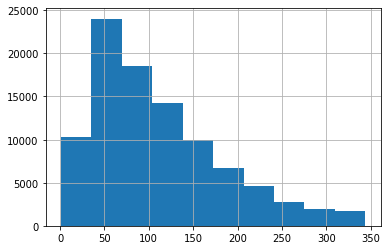

In [73]:
dfmerge['payment_value'].hist(bins=10)

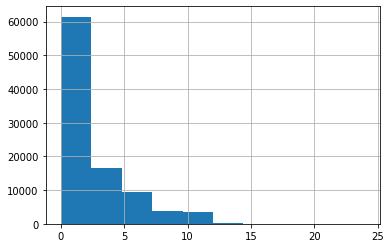

In [74]:
dfmerge['payment_installments'].hist(bins=10)

#customer ID that have high payment value

In [75]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94798 entries, 0 to 102966
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94798 non-null  object        
 1   customer_id                    94798 non-null  object        
 2   order_status                   94798 non-null  object        
 3   order_purchase_timestamp       94798 non-null  datetime64[ns]
 4   order_approved_at              94798 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94798 non-null  datetime64[ns]
 6   order_approve_date             94798 non-null  object        
 7   payment_type                   94798 non-null  object        
 8   payment_installments           94798 non-null  int64         
 9   payment_value                  94798 non-null  int64         
 10  customer_unique_id             94798 non-null  object        
 11  customer_zip_c

In [76]:
dfg_topinv = dfmerge.groupby('customer_city')['payment_value'].agg('sum').reset_index()
dfg_topinv

,customer_city,payment_value
0,abadia dos dourados,412
1,abaete,1321
2,abaetetuba,970
3,abaiara,331
4,abaira,202
...,...,...
3995,xinguara,997
3996,xique-xique,229
3997,zacarias,229
3998,ze doca,469


In [77]:
dfg_topinv.sort_values(by='payment_value',ascending = False,inplace = True)
dfg_topinv

,customer_city,payment_value
3487,sao paulo,1510108
3054,rio de janeiro,743456
440,belo horizonte,296898
539,brasilia,227679
1108,curitiba,157117
...,...,...
1228,erico cardoso,24
3680,tamboara,24
1899,jenipapo de minas,22
2831,polo petroquimico de triunfo,20


In [78]:
dfg_top10inv = dfg_topinv.head(10)
dfg_top10inv

,customer_city,payment_value
3487,sao paulo,1510108
3054,rio de janeiro,743456
440,belo horizonte,296898
539,brasilia,227679
1108,curitiba,157117
2866,porto alegre,154486
684,campinas,142525
3145,salvador,136163
1482,guarulhos,121920
2387,niteroi,95744


#Number of Order Month to Date

In [93]:
dfmerge= dfmerge.copy()
dfmerge.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,credit_card,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,2018-07-26,boleto,1,141,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,2018-08-08,credit_card,3,179,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [94]:
dfmerge['year'] = dfmerge['order_purchase_timestamp'].dt.year
dfmerge['month'] = dfmerge['order_purchase_timestamp'].dt.month
dfmerge.info()
dfmerge

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94798 entries, 0 to 102966
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94798 non-null  object        
 1   customer_id                    94798 non-null  object        
 2   order_status                   94798 non-null  object        
 3   order_purchase_timestamp       94798 non-null  datetime64[ns]
 4   order_approved_at              94798 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94798 non-null  datetime64[ns]
 6   order_approve_date             94798 non-null  object        
 7   payment_type                   94798 non-null  object        
 8   payment_installments           94798 non-null  int64         
 9   payment_value                  94798 non-null  int64         
 10  customer_unique_id             94798 non-null  object        
 11  customer_zip_c

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,credit_card,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,2018-07-26,boleto,1,141,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,2018-08-08,credit_card,3,179,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102961,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-22,2017-02-23,credit_card,3,155,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,2017,2
102962,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-28,2017-03-09,credit_card,3,85,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017,3
102963,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,2018-02-06,credit_card,3,195,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018,2
102964,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,2017-08-27,credit_card,5,271,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017,8


In [95]:
dfmerge['month_name'] = dfmerge['order_purchase_timestamp'].dt.strftime("%B")
dfmerge['day_name'] = dfmerge['order_purchase_timestamp'].dt.strftime("%A")
dfmerge.info()
dfmerge.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94798 entries, 0 to 102966
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94798 non-null  object        
 1   customer_id                    94798 non-null  object        
 2   order_status                   94798 non-null  object        
 3   order_purchase_timestamp       94798 non-null  datetime64[ns]
 4   order_approved_at              94798 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94798 non-null  datetime64[ns]
 6   order_approve_date             94798 non-null  object        
 7   payment_type                   94798 non-null  object        
 8   payment_installments           94798 non-null  int64         
 9   payment_value                  94798 non-null  int64         
 10  customer_unique_id             94798 non-null  object        
 11  customer_zip_c

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month,month_name,day_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,credit_card,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,2018-07-26,boleto,1,141,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018,7,July,Tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,2018-08-08,credit_card,3,179,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018,8,August,Wednesday
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-15,2017-11-18,credit_card,1,72,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017,11,November,Saturday
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-26,2018-02-13,credit_card,1,28,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018,2,February,Tuesday
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-08-01,2017-07-09,credit_card,6,175,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017,7,July,Sunday
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-05-09,2017-04-13,credit_card,1,65,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017,4,April,Tuesday
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-06-07,2017-05-16,credit_card,3,75,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017,5,May,Tuesday


In [96]:
dfmerge['Period'] = dfmerge['year'].map(str) +'-'+ dfmerge['month_name'].map(str)
dfmerge.info()
dfmerge

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94798 entries, 0 to 102966
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94798 non-null  object        
 1   customer_id                    94798 non-null  object        
 2   order_status                   94798 non-null  object        
 3   order_purchase_timestamp       94798 non-null  datetime64[ns]
 4   order_approved_at              94798 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94798 non-null  datetime64[ns]
 6   order_approve_date             94798 non-null  object        
 7   payment_type                   94798 non-null  object        
 8   payment_installments           94798 non-null  int64         
 9   payment_value                  94798 non-null  int64         
 10  customer_unique_id             94798 non-null  object        
 11  customer_zip_c

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month,month_name,day_name,Period
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,credit_card,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday,2017-October
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday,2017-October
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday,2017-October
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,2018-07-26,boleto,1,141,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018,7,July,Tuesday,2018-July
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,2018-08-08,credit_card,3,179,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018,8,August,Wednesday,2018-August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102961,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-22,2017-02-23,credit_card,3,155,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,2017,2,February,Thursday,2017-February
102962,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-28,2017-03-09,credit_card,3,85,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017,3,March,Thursday,2017-March
102963,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,2018-02-06,credit_card,3,195,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018,2,February,Tuesday,2018-February
102964,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,2017-08-27,credit_card,5,271,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017,8,August,Sunday,2017-August


In [97]:
dfmerge['Y0M'] = dfmerge[['year','month']].dot([100,1])
dfmerge.info()
dfmerge

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94798 entries, 0 to 102966
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94798 non-null  object        
 1   customer_id                    94798 non-null  object        
 2   order_status                   94798 non-null  object        
 3   order_purchase_timestamp       94798 non-null  datetime64[ns]
 4   order_approved_at              94798 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94798 non-null  datetime64[ns]
 6   order_approve_date             94798 non-null  object        
 7   payment_type                   94798 non-null  object        
 8   payment_installments           94798 non-null  int64         
 9   payment_value                  94798 non-null  int64         
 10  customer_unique_id             94798 non-null  object        
 11  customer_zip_c

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_approve_date,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,year,month,month_name,day_name,Period,Y0M
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,credit_card,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday,2017-October,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,2,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday,2017-October,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18,2017-10-02,voucher,1,18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,October,Monday,2017-October,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13,2018-07-26,boleto,1,141,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018,7,July,Tuesday,2018-July,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04,2018-08-08,credit_card,3,179,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018,8,August,Wednesday,2018-August,201808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102961,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-22,2017-02-23,credit_card,3,155,831ce3f1bacbd424fc4e38fbd4d66d29,5127,sao paulo,SP,2017,2,February,Thursday,2017-February,201702
102962,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-28,2017-03-09,credit_card,3,85,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017,3,March,Thursday,2017-March,201703
102963,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-03-02,2018-02-06,credit_card,3,195,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018,2,February,Tuesday,2018-February,201802
102964,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-27,2017-08-27,credit_card,5,271,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017,8,August,Sunday,2017-August,201708


In [98]:
dfmerge.groupby('order_status', as_index=False).agg({'order_id' : ['count', 'nunique']})

order_status order_id        
                  count nunique
0     approved        2       2
1     canceled      445     425
2    delivered    92200   88983
3     invoiced      276     267
4   processing      256     249
5      shipped     1053    1015
6  unavailable      566     542

#VISUALIZE DATA

In [99]:
dfg_order_month = dfmerge.groupby('Period')['order_id'].agg('count').reset_index()
dfg_order_month.sort_values(by='Period',ascending = True,inplace = True)
dfg_order_month.columns = ['Period','Total_Order']
dfg_order_month

,Period,Total_Order
0,2016-December,1
1,2016-October,294
2,2016-September,3
3,2017-April,2318
4,2017-August,4146
5,2017-December,5441
6,2017-February,1697
7,2017-January,741
8,2017-July,3950
9,2017-June,3148


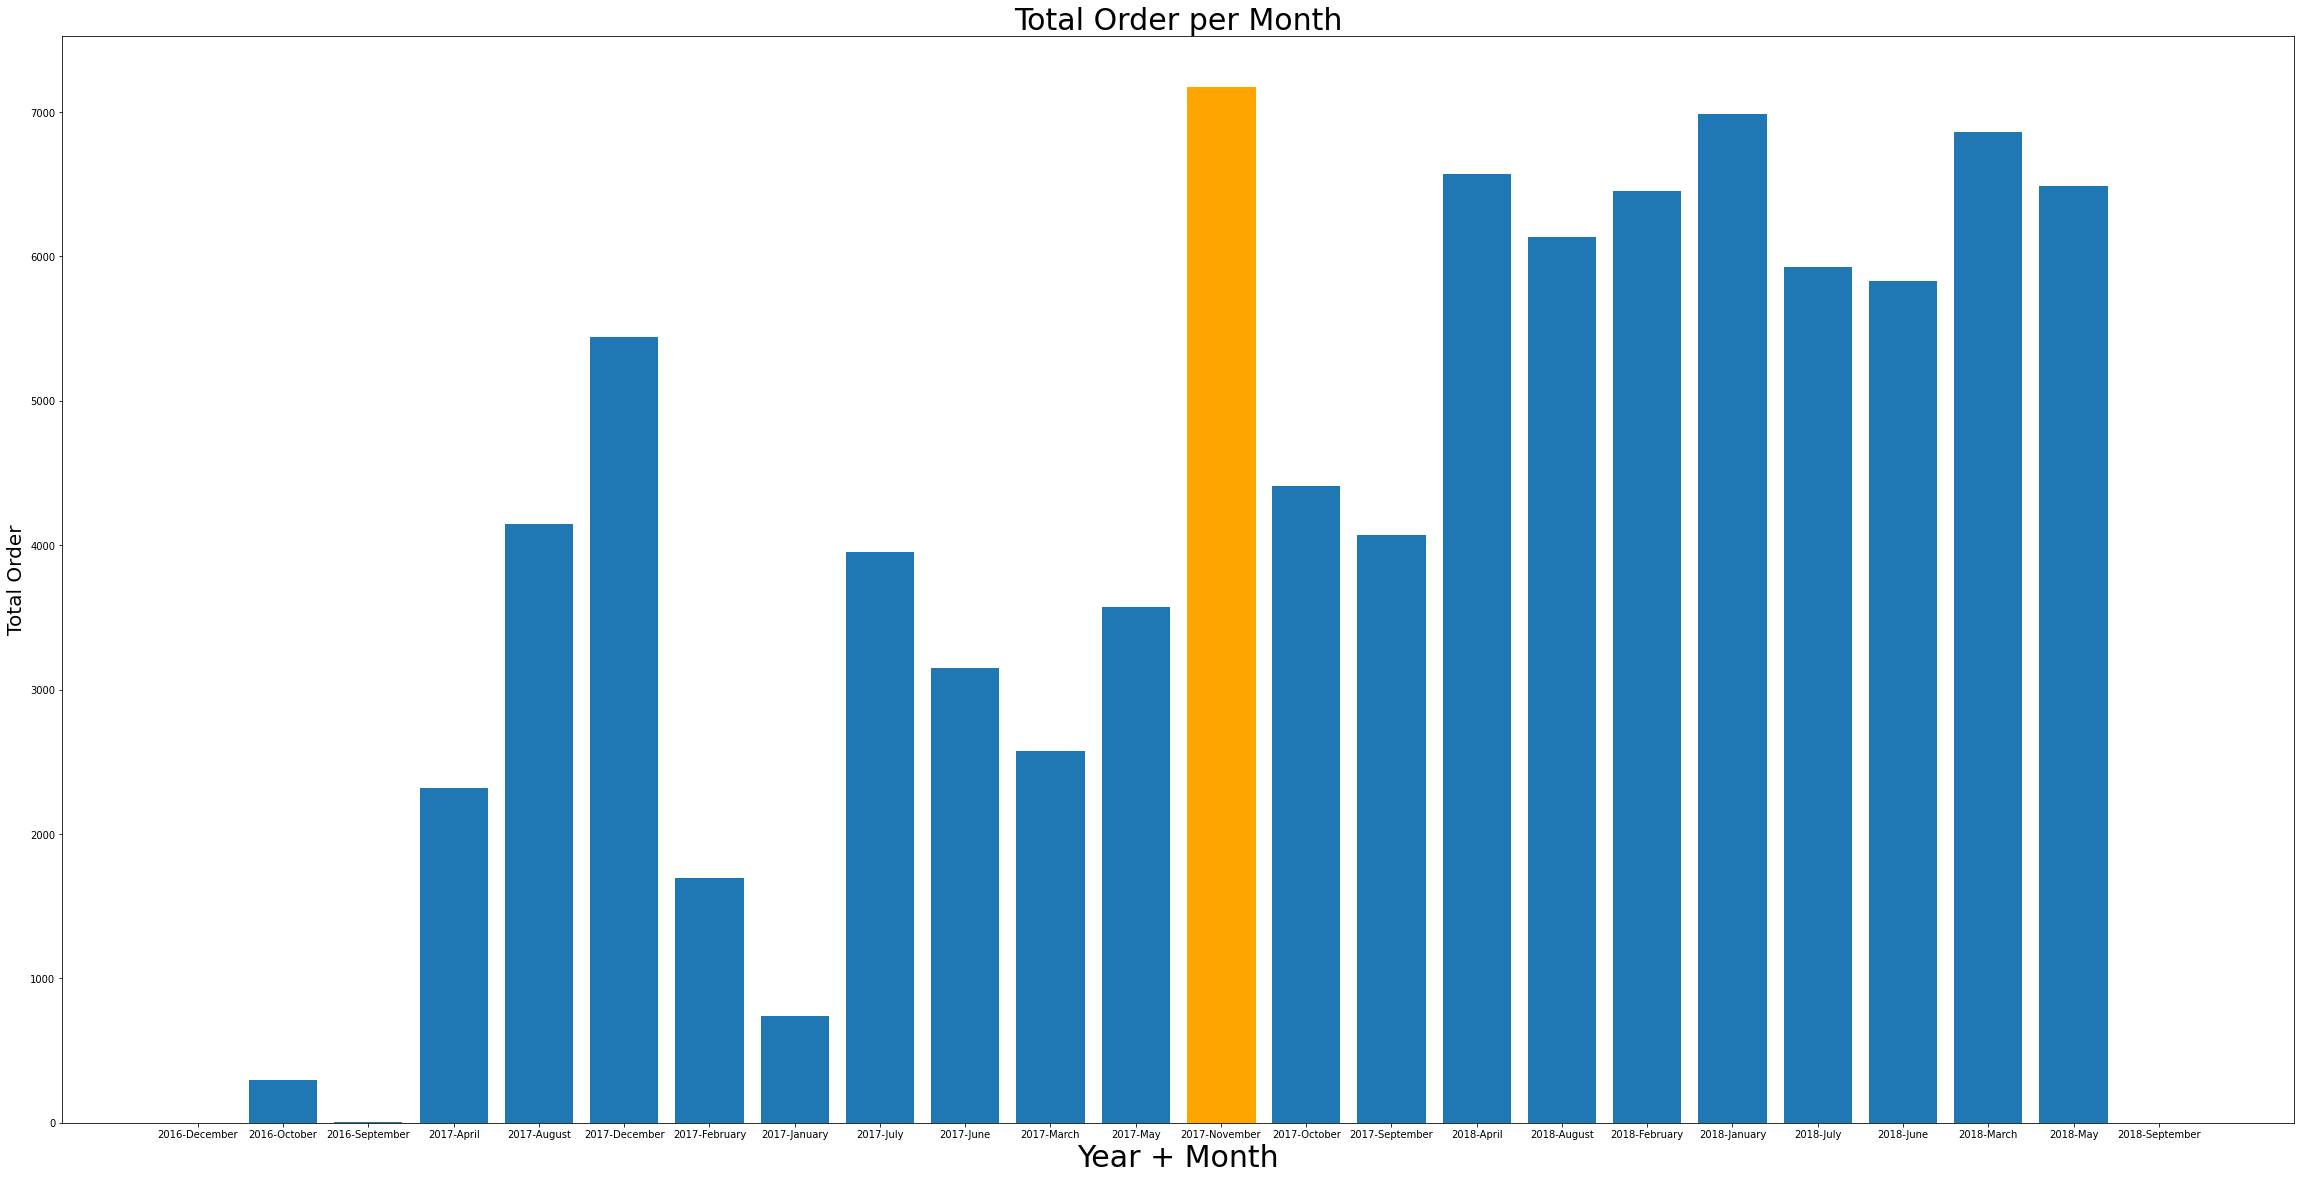

In [101]:
plt.figure(figsize = (40,20))
plt.title('Total Order per Month',fontsize=30)
plt.xlabel('Year + Month',fontsize=30)
plt.ylabel('Total Order',fontsize=20)

x = dfg_order_month['Period']
y = dfg_order_month['Total_Order']

barlist_1 = plt.bar(x,y)
barlist_1[12].set_color('orange')
plt.show()

From this graph result we can see highest order happen in November 2017.

In [102]:
dfg_order_day = dfmerge.groupby('day_name')['order_id'].agg('count').reset_index()
dfg_order_day.sort_values(by='day_name',ascending = True,inplace = True)
dfg_order_day.columns = ['day_name','order_id']
dfg_order_day

,day_name,order_id
0,Friday,13427
1,Monday,15385
2,Saturday,10389
3,Sunday,11455
4,Thursday,14083
5,Tuesday,15252
6,Wednesday,14807


In [103]:
dfg_order_day.loc[dfg_order_day['day_name'] == 'Friday', 'day_name'] = '5. Friday'
dfg_order_day.loc[dfg_order_day['day_name'] == 'Monday', 'day_name'] = '1. Monday'
dfg_order_day.loc[dfg_order_day['day_name'] == 'Saturday', 'day_name'] = '6. Saturday '
dfg_order_day.loc[dfg_order_day['day_name'] == 'Sunday', 'day_name'] = '7. Sunday'
dfg_order_day.loc[dfg_order_day['day_name'] == 'Thursday', 'day_name'] = '4. Thursday'
dfg_order_day.loc[dfg_order_day['day_name'] == 'Tuesday', 'day_name'] = '2. Tuesday'
dfg_order_day.loc[dfg_order_day['day_name'] == 'Wednesday', 'day_name'] = '3. Wednesday'

dfg_order_day.sort_values(by='day_name',ascending = True,inplace = True)
dfg_order_day

,day_name,order_id
1,1. Monday,15385
5,2. Tuesday,15252
6,3. Wednesday,14807
4,4. Thursday,14083
0,5. Friday,13427
2,6. Saturday,10389
3,7. Sunday,11455


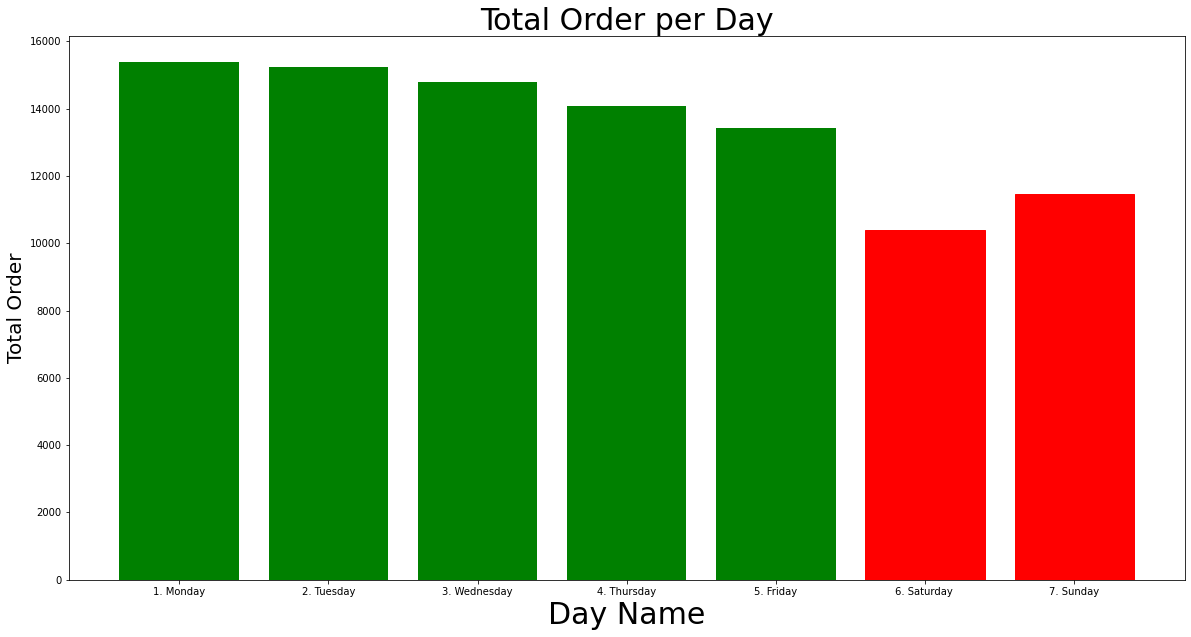

In [108]:
plt.figure(figsize = (20,10))
plt.title('Total Order per Day',fontsize=30)
plt.xlabel('Day Name',fontsize=30)
plt.ylabel('Total Order',fontsize=20)

x = dfg_order_day['day_name']
y = dfg_order_day['order_id']

barlist = plt.bar(x,y, color = 'g')
barlist[5].set_color('r')
barlist[6].set_color('r')
plt.show()

we can see busiest day happen in monday so we can make promo during weekend to attract more order as weekend is among lowest order daily.

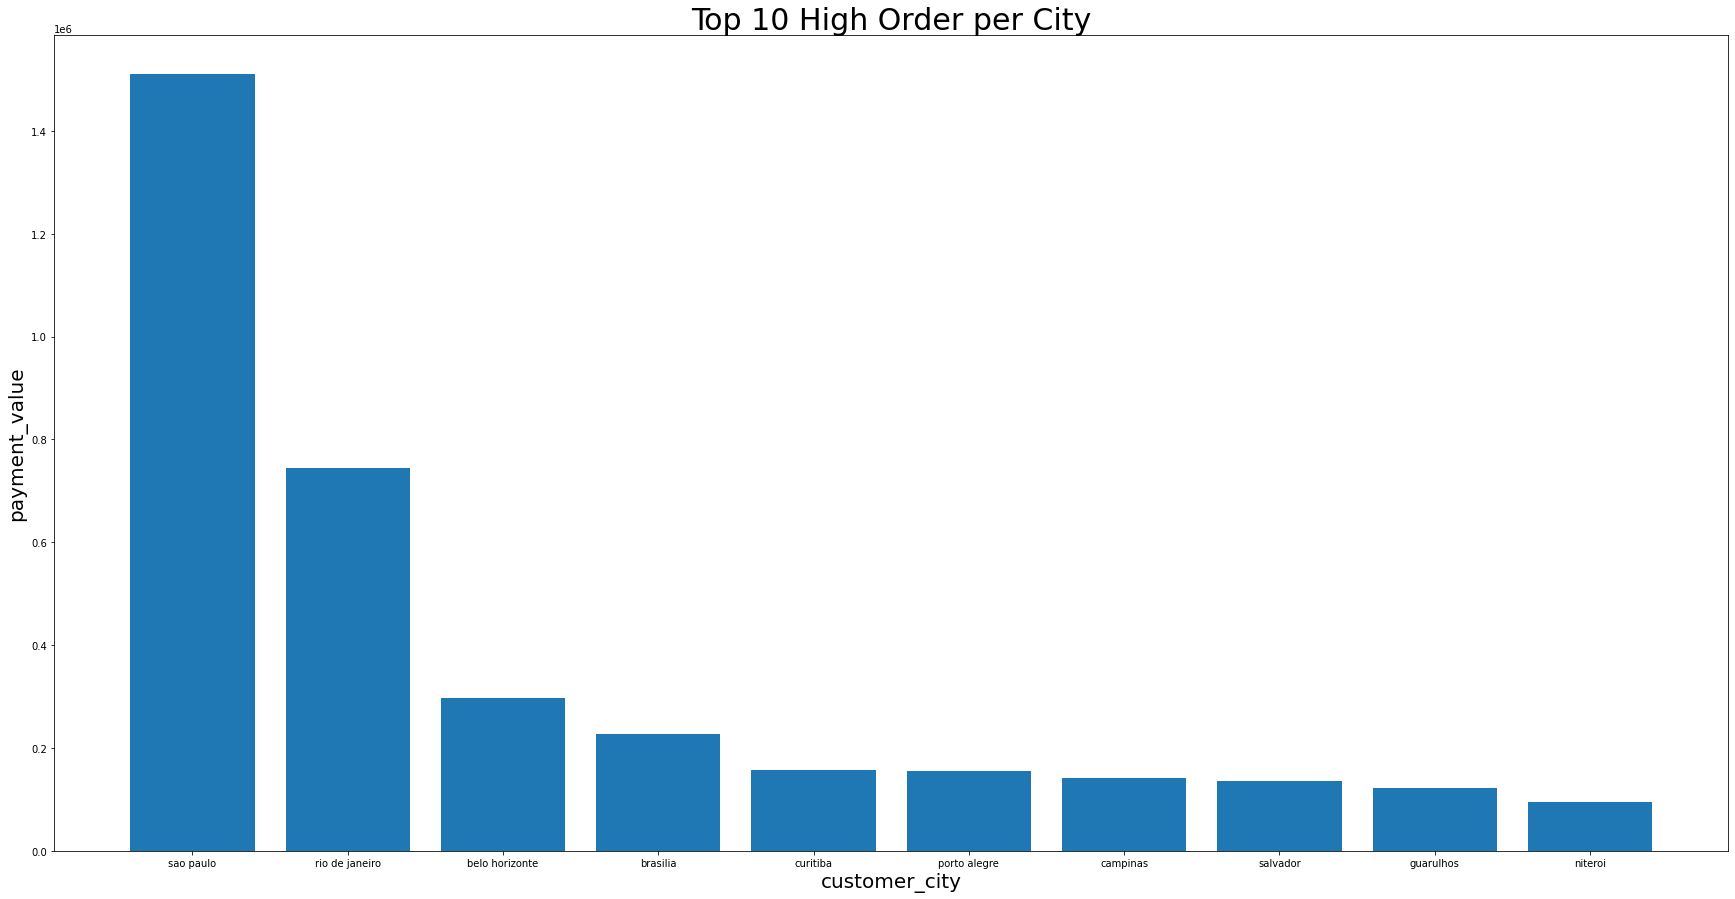

In [79]:
plt.figure(figsize = (30,15))
plt.title('Top 10 High Order per City',fontsize=30)
plt.xlabel('customer_city',fontsize=20)
plt.ylabel('payment_value',fontsize=20)

x = dfg_top10inv['customer_city']
y = dfg_top10inv['payment_value']

plt.bar(x,y)
plt.show()

#payment type

In [80]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94798 entries, 0 to 102966
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94798 non-null  object        
 1   customer_id                    94798 non-null  object        
 2   order_status                   94798 non-null  object        
 3   order_purchase_timestamp       94798 non-null  datetime64[ns]
 4   order_approved_at              94798 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94798 non-null  datetime64[ns]
 6   order_approve_date             94798 non-null  object        
 7   payment_type                   94798 non-null  object        
 8   payment_installments           94798 non-null  int64         
 9   payment_value                  94798 non-null  int64         
 10  customer_unique_id             94798 non-null  object        
 11  customer_zip_c

In [109]:
df_pay_type = dfmerge.groupby('payment_type')['order_id'].agg('nunique').reset_index() 
df_pay_type2 = dfmerge.groupby('payment_type', as_index=False).agg({'order_id' : ['count', 'nunique']})

df_pay_type

,payment_type,order_id
0,boleto,18477
1,credit_card,69908
2,debit_card,1443
3,voucher,3730


In [110]:
df_pay_type2

payment_type order_id        
                  count nunique
0       boleto    18477   18477
1  credit_card    70108   69908
2   debit_card     1444    1443
3      voucher     4769    3730

In [111]:
total_order = df_pay_type['order_id'].sum()
total_order

93558

In [112]:
df_pay_type['Order%'] = (df_pay_type['order_id']/total_order) * 100
df_pay_type.info()
df_pay_type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   payment_type  4 non-null      object 
 1   order_id      4 non-null      int64  
 2   Order%        4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


,payment_type,order_id,Order%
0,boleto,18477,19.74924645674341
1,credit_card,69908,74.72156309455097
2,debit_card,1443,1.5423587507214775
3,voucher,3730,3.986831697984138


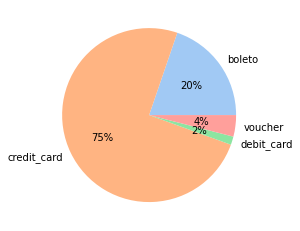

In [113]:
#define data
# data = [15, 25, 25, 30, 5]
labels = df_pay_type['payment_type']#['Boleto', 'Credit Card', 'Debit Card', 'Voucher']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df_pay_type['Order%'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

From this pie chart result we can see most of our buyer using credit card.